In [1]:
import os, shutil

train_dir =r"C:\Users\krmtt\Desktop\E_Scooter_Dataset\train"
validation_dir =r"C:\Users\krmtt\Desktop\E_Scooter_Dataset\validation"
test_dir =r"C:\Users\krmtt\Desktop\E_Scooter_Dataset\test"
train_esc_dir =r"C:\Users\krmtt\Desktop\E_Scooter_Dataset\train\esc"
train_no_esc_dir =r"C:\Users\krmtt\Desktop\E_Scooter_Dataset\train\no_esc"
validation_esc_dir =r"C:\Users\krmtt\Desktop\E_Scooter_Dataset\validation\esc"
validation_no_esc_dir =r"C:\Users\krmtt\Desktop\E_Scooter_Dataset\validation\no_esc"
test_esc_dir =r"C:\Users\krmtt\Desktop\E_Scooter_Dataset\test\esc"
test_no_esc_dir =r"C:\Users\krmtt\Desktop\E_Scooter_Dataset\test\no_esc"

In [2]:
print('total training e scooter rider images:', len(os.listdir(train_esc_dir)))
print('total training non e scooter rider images:', len(os.listdir(train_no_esc_dir)))
print('total validation e scooter rider images:', len(os.listdir(validation_esc_dir)))
print('total validation non e scooter rider images:', len(os.listdir(validation_no_esc_dir)))
print('total test e scooter rider images:', len(os.listdir(test_esc_dir)))
print('total test non e scooter rider images:', len(os.listdir(test_no_esc_dir)))

total training e scooter rider images: 6441
total training non e scooter rider images: 6441
total validation e scooter rider images: 779
total validation non e scooter rider images: 779
total test e scooter rider images: 1269
total test non e scooter rider images: 1226


In [3]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(160, 160, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 158, 158, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 77, 77, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 128)       0         
________________________________________________

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(160, 160), batch_size=32, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(160, 160), batch_size=32, class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(160, 160), batch_size=32, class_mode='binary')

Found 12882 images belonging to 2 classes.
Found 1558 images belonging to 2 classes.
Found 2495 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('label batch shape:',labels_batch.shape)
    break

data batch shape: (32, 160, 160, 3)
label batch shape: (32,)


In [7]:
history = model.fit_generator(train_generator, steps_per_epoch=128, epochs=80, validation_data=validation_generator,validation_steps=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/80
128/128 [==============================] - 28s 222ms/step - loss: 0.6201 - acc: 0.6528 - val_loss: 0.5662 - val_acc: 0.7115
Epoch 2/80
128/128 [==============================] - 15s 114ms/step - loss: 0.5065 - acc: 0.7532 - val_loss: 0.5869 - val_acc: 0.6936
Epoch 3/80
128/128 [==============================] - 14s 106ms/step - loss: 0.4515 - acc: 0.7891 - val_loss: 0.5037 - val_acc: 0.7576
Epoch 4/80
128/128 [==============================] - 11s 88ms/step - loss: 0.3859 - acc: 0.8259 - val_loss: 0.5115 - val_acc: 0.7533
Epoch 5/80
128/128 [==============================] - 11s 84ms/step - loss: 0.3720 - acc: 0.8347 - val_loss: 0.4309 - val_acc: 0.8032
Epoch 6/80
128/128 [==============================] - 11s 84ms/step - loss: 0.3311 - acc: 0.8558 - val_loss: 0.4499 - val_acc: 0.7981
Epoch 7/80
128/128 [==============================] - 11s 86ms/step - loss: 0.2844 - acc: 0.8812 - val_loss: 0.4478 - val_acc: 0.7949
Epoch 8/80


Epoch 60/80
128/128 [==============================] - 11s 84ms/step - loss: 0.0064 - acc: 0.9978 - val_loss: 0.9564 - val_acc: 0.8327
Epoch 61/80
128/128 [==============================] - 11s 83ms/step - loss: 0.0137 - acc: 0.9973 - val_loss: 0.9985 - val_acc: 0.8458
Epoch 62/80
128/128 [==============================] - 11s 83ms/step - loss: 0.0210 - acc: 0.9946 - val_loss: 0.9166 - val_acc: 0.8180
Epoch 63/80
128/128 [==============================] - 11s 87ms/step - loss: 0.0142 - acc: 0.9963 - val_loss: 1.2837 - val_acc: 0.8052
Epoch 64/80
128/128 [==============================] - 11s 83ms/step - loss: 0.0161 - acc: 0.9966 - val_loss: 0.9948 - val_acc: 0.8104
Epoch 65/80
128/128 [==============================] - 11s 84ms/step - loss: 0.0175 - acc: 0.9971 - val_loss: 1.1675 - val_acc: 0.8408
Epoch 66/80
128/128 [==============================] - 11s 86ms/step - loss: 0.0239 - acc: 0.9951 - val_loss: 0.7855 - val_acc: 0.8431
Epoch 67/80
128/128 [==============================] - 

In [8]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.795


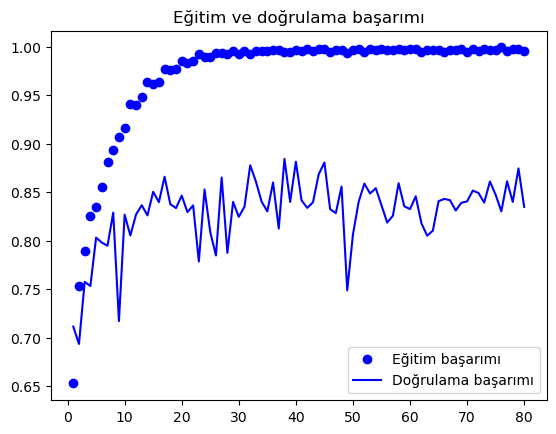

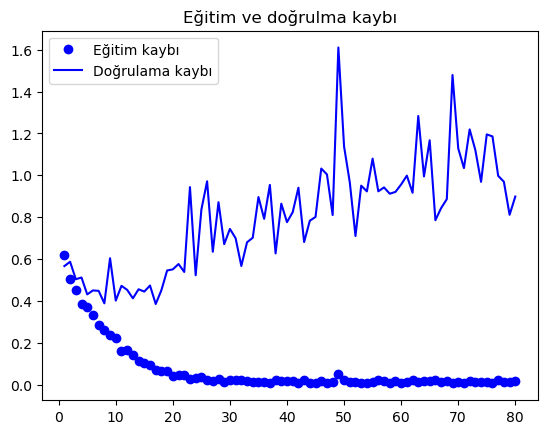

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Eğitim başarımı')
plt.plot(epochs, val_acc, 'b', label='Doğrulama başarımı')
plt.title('Eğitim ve doğrulama başarımı')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Eğitim kaybı')
plt.plot(epochs, val_loss, 'b', label='Doğrulama kaybı')
plt.title('Eğitim ve doğrulma kaybı')
plt.legend()

plt.show()

In [10]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

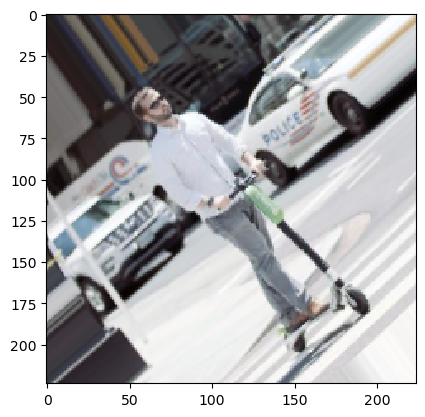

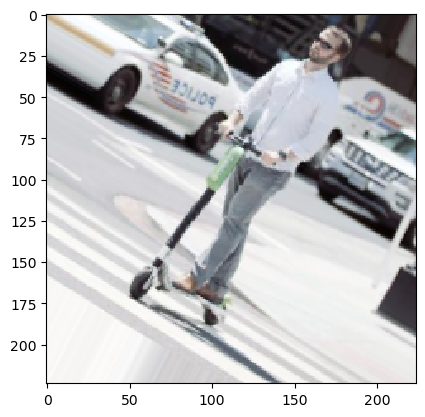

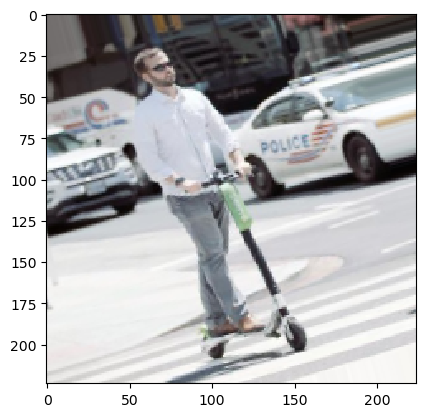

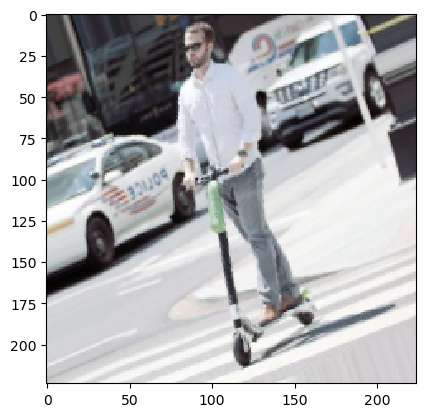

In [29]:
from keras_preprocessing import image

fnames = [os.path.join(train_esc_dir, fname) for fname in os.listdir(train_esc_dir) ]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [12]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(160, 160, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=128,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=128)

Found 12882 images belonging to 2 classes.
Found 1558 images belonging to 2 classes.
Epoch 1/100
128/128 [==============================] - 29s 224ms/step - loss: 0.6725 - acc: 0.5723 - val_loss: 0.6798 - val_acc: 0.5513
Epoch 2/100
128/128 [==============================] - 27s 207ms/step - loss: 0.5939 - acc: 0.6810 - val_loss: 0.6395 - val_acc: 0.6481
Epoch 3/100
128/128 [==============================] - 27s 207ms/step - loss: 0.5440 - acc: 0.7246 - val_loss: 0.7290 - val_acc: 0.6077
Epoch 4/100
128/128 [==============================] - 27s 210ms/step - loss: 0.5276 - acc: 0.7363 - val_loss: 0.6076 - val_acc: 0.6542
Epoch 5/100
128/128 [==============================] - 27s 209ms/step - loss: 0.5071 - acc: 0.7402 - val_loss: 0.6175 - val_acc: 0.6399
Epoch 6/100
128/128 [==============================] - 27s 209ms/step - loss: 0.5025 - acc: 0.7485 - val_loss: 0.6485 - val_acc: 0.5881
Epoch 7/100
128/128 [==============================] - 26s 206ms/step - loss: 0.4689 - acc: 0.7661 

128/128 [==============================] - 29s 224ms/step - loss: 0.1869 - acc: 0.9248 - val_loss: 0.5659 - val_acc: 0.7870
Epoch 61/100
128/128 [==============================] - 31s 243ms/step - loss: 0.1916 - acc: 0.9290 - val_loss: 0.3389 - val_acc: 0.8792
Epoch 62/100
128/128 [==============================] - 32s 251ms/step - loss: 0.1773 - acc: 0.9312 - val_loss: 0.3015 - val_acc: 0.8957
Epoch 63/100
128/128 [==============================] - 29s 228ms/step - loss: 0.1888 - acc: 0.9250 - val_loss: 0.3513 - val_acc: 0.8669
Epoch 64/100
128/128 [==============================] - 30s 232ms/step - loss: 0.1777 - acc: 0.9356 - val_loss: 0.5009 - val_acc: 0.8242
Epoch 65/100
128/128 [==============================] - 30s 235ms/step - loss: 0.1838 - acc: 0.9292 - val_loss: 0.4312 - val_acc: 0.8479
Epoch 66/100
128/128 [==============================] - 31s 242ms/step - loss: 0.1719 - acc: 0.9341 - val_loss: 0.5433 - val_acc: 0.7954
Epoch 67/100
128/128 [==============================] 

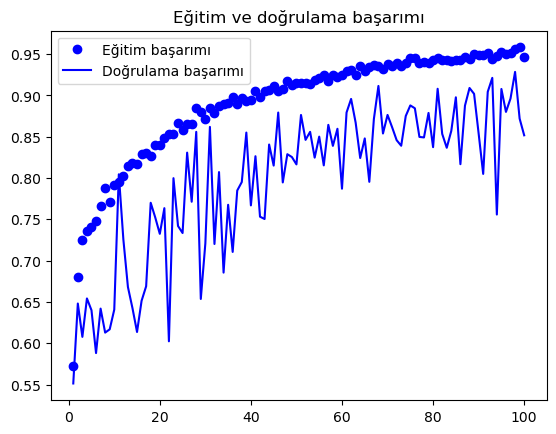

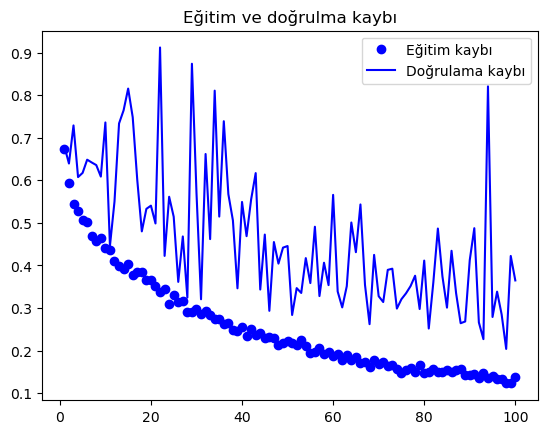

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Eğitim başarımı')
plt.plot(epochs, val_acc, 'b', label='Doğrulama başarımı')
plt.title('Eğitim ve doğrulama başarımı')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Eğitim kaybı')
plt.plot(epochs, val_loss, 'b', label='Doğrulama kaybı')
plt.title('Eğitim ve doğrulma kaybı')
plt.legend()

plt.show()

In [15]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.82125


In [39]:
from keras.applications import VGG19
conv_base = VGG19(weights='imagenet',
                include_top=False,
                input_shape=(160, 160, 3))

80142336/80134624 [==============================] - 10s 0us/step


In [43]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 160, 160, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0     

In [41]:
from keras import models 
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 5, 5, 512)         20024384  
_________________________________________________________________
flatten_5 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               3277056   
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 23,301,697
Trainable params: 23,301,697
Non-trainable params: 0
_________________________________________________________________


In [42]:
print('conv_base dondurulmadan önce '
      'öğrenen ağırlık sayısı: ',len(model.trainable_weights))
conv_base.trainable = False
print('conv_base dondurulduktan sonra '
      'öğrenen ağırlık sayısı: ',len(model.trainable_weights))

conv_base dondurulmadan önce öğrenen ağırlık sayısı:  36
conv_base dondurulduktan sonra öğrenen ağırlık sayısı:  4


In [44]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 39s 392ms/step - loss: 0.5600 - acc: 0.7111 - val_loss: 0.6507 - val_acc: 0.5950
Epoch 2/30
100/100 [==============================] - 26s 262ms/step - loss: 0.4747 - acc: 0.7706 - val_loss: 0.5567 - val_acc: 0.6937
Epoch 3/30
100/100 [==============================] - 24s 235ms/step - loss: 0.4439 - acc: 0.7863 - val_loss: 0.5748 - val_acc: 0.6792
Epoch 4/30
100/100 [==============================] - 24s 244ms/step - loss: 0.4146 - acc: 0.8078 - val_loss: 0.5939 - val_acc: 0.6478
Epoch 5/30
100/100 [==============================] - 27s 269ms/step - loss: 0.3933 - acc: 0.8159 - val_loss: 0.5136 - val_acc: 0.7277
Epoch 6/30
100/100 [==============================] - 24s 242ms/step - loss: 0.3912 - acc: 0.8256 - val_loss: 0.4468 - val_acc: 0.7830
Epoch 7/30
100/100 [==============================] - 24s 244ms/step - loss: 0.3832 - acc: 0.8287 - val_loss: 0.5491 - val_acc: 0.7126
Epoch 8/30
100/100 [==============================] - 2

In [ ]:
from keras.applications.vgg16 import VGG19
model = VGG16(weights='imagenet')

In [27]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [37]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=1000)[0])

Predicted: [('n03141823', 'crutch', 0.54801), ('n04019541', 'puck', 0.041149616), ('n03977966', 'police_van', 0.038411006), ('n02906734', 'broom', 0.03782293), ('n04482393', 'tricycle', 0.03611179), ('n09229709', 'bubble', 0.025769701), ('n03769881', 'minibus', 0.017030668), ('n03770439', 'miniskirt', 0.013004764), ('n02701002', 'ambulance', 0.012628328), ('n02930766', 'cab', 0.012215098), ('n03791053', 'motor_scooter', 0.011677434), ('n03891332', 'parking_meter', 0.011306646), ('n03763968', 'military_uniform', 0.009368418), ('n04487081', 'trolleybus', 0.008506049), ('n04509417', 'unicycle', 0.0081723435), ('n03970156', 'plunger', 0.007067237), ('n03770679', 'minivan', 0.0065324865), ('n04037443', 'racer', 0.006394564), ('n04335435', 'streetcar', 0.0061666355), ('n04557648', 'water_bottle', 0.0056200484), ('n03630383', 'lab_coat', 0.005272078), ('n04367480', 'swab', 0.0048034135), ('n04336792', 'stretcher', 0.0046989135), ('n04456115', 'torch', 0.00397742), ('n04517823', 'vacuum', 0.00